# https://www.kaggle.com/c/allstate-claims-severity/overview/description

In [ ]:
# https://xgboost.readthedocs.io/en/latest/parameter.html
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
# https://github.com/dnkirill/allstate_capstone/blob/master/part2_xgboost.ipynb
# https://github.com/dnkirill/allstate_capstone/blob/master/part3_mlp.ipynb
# https://github.com/dnkirill/allstate_capstone/blob/master/part4_stacking.ipynb


In [ ]:
# Метрика МАЕ
# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.cross_validation import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy
from xgboost import XGBRegressor
import xgboost as xgb



import pickle
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.cross_validation import KFold, train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\frank\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('C:\\Data\\AllState\\train.csv')

In [3]:
test = pd.read_csv('C:\\Data\\AllState\\test.csv')

In [4]:
sample_submission = pd.read_csv('C:\\Data\\AllState\\sample_submission.csv')

In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [7]:
sample_submission.head()

,id,loss
0,4,0
1,6,0
2,9,0
3,12,0
4,15,0


In [8]:
print (train.shape)
print (test.shape)
print (sample_submission.shape)

(188318, 132)
(125546, 131)
(125546, 2)


In [9]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [10]:
test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,294067.153442,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,170098.335649,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,4.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,146414.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,294306.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,441800.000000,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [11]:
pd.isnull(train).values.any()

False

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [13]:
list(train.columns)

['id',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 

In [14]:
cat_features = list(train.select_dtypes(include=['object']).columns)
print ("Categorical: {} features".format(len(cat_features)))

Categorical: 116 features


In [15]:
cont_features = [cont for cont in list(train.select_dtypes(
                 include=['float64', 'int64']).columns) if cont not in ['loss', 'id']]
print ("Continuous: {} features".format(len(cont_features)))

Continuous: 14 features


In [16]:
cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(train[cat].unique()))

In [17]:
dict([('cat_name', cat_features), ('unique_values', cat_uniques)])

{'cat_name': ['cat1',
  'cat2',
  'cat3',
  'cat4',
  'cat5',
  'cat6',
  'cat7',
  'cat8',
  'cat9',
  'cat10',
  'cat11',
  'cat12',
  'cat13',
  'cat14',
  'cat15',
  'cat16',
  'cat17',
  'cat18',
  'cat19',
  'cat20',
  'cat21',
  'cat22',
  'cat23',
  'cat24',
  'cat25',
  'cat26',
  'cat27',
  'cat28',
  'cat29',
  'cat30',
  'cat31',
  'cat32',
  'cat33',
  'cat34',
  'cat35',
  'cat36',
  'cat37',
  'cat38',
  'cat39',
  'cat40',
  'cat41',
  'cat42',
  'cat43',
  'cat44',
  'cat45',
  'cat46',
  'cat47',
  'cat48',
  'cat49',
  'cat50',
  'cat51',
  'cat52',
  'cat53',
  'cat54',
  'cat55',
  'cat56',
  'cat57',
  'cat58',
  'cat59',
  'cat60',
  'cat61',
  'cat62',
  'cat63',
  'cat64',
  'cat65',
  'cat66',
  'cat67',
  'cat68',
  'cat69',
  'cat70',
  'cat71',
  'cat72',
  'cat73',
  'cat74',
  'cat75',
  'cat76',
  'cat77',
  'cat78',
  'cat79',
  'cat80',
  'cat81',
  'cat82',
  'cat83',
  'cat84',
  'cat85',
  'cat86',
  'cat87',
  'cat88',
  'cat89',
  'cat90',
  'cat9

In [18]:
uniq_values_in_categories = pd.DataFrame.from_dict(dict([('cat_name', cat_features), ('unique_values', cat_uniques)]))

In [19]:
uniq_values_in_categories.sort_values(by=['unique_values'], ascending=False)

,cat_name,unique_values
115,cat116,326
109,cat110,131
108,cat109,84
112,cat113,61
111,cat112,51
114,cat115,23
106,cat107,20
104,cat105,20
100,cat101,19
113,cat114,19


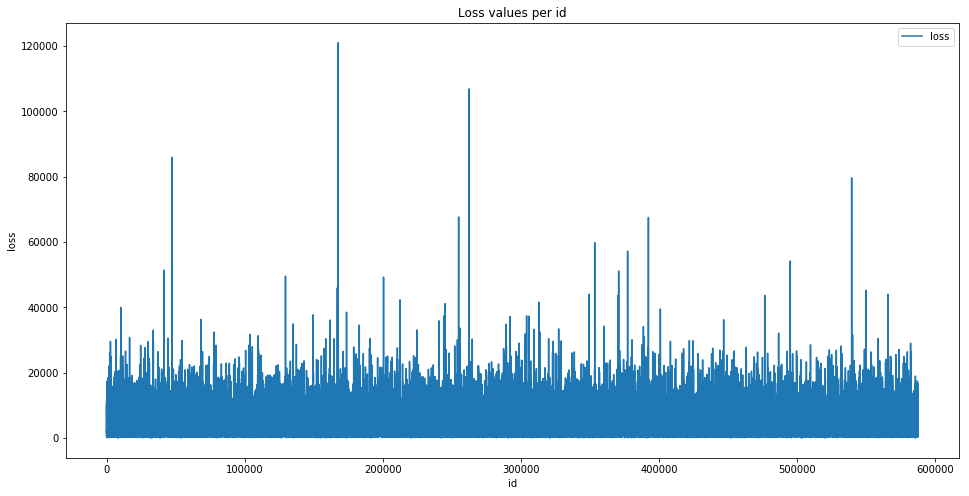

In [20]:
plt.figure(figsize=(16,8))
plt.plot(train['id'], train['loss'])
plt.title('Loss values per id')
plt.xlabel('id')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
train['loss'].sort_values(ascending=True).values

array([6.7000000e-01, 5.2500000e+00, 6.0000000e+00, ..., 8.5923560e+04,
       1.0686300e+05, 1.2101225e+05])

No handles with labels found to put in legend.


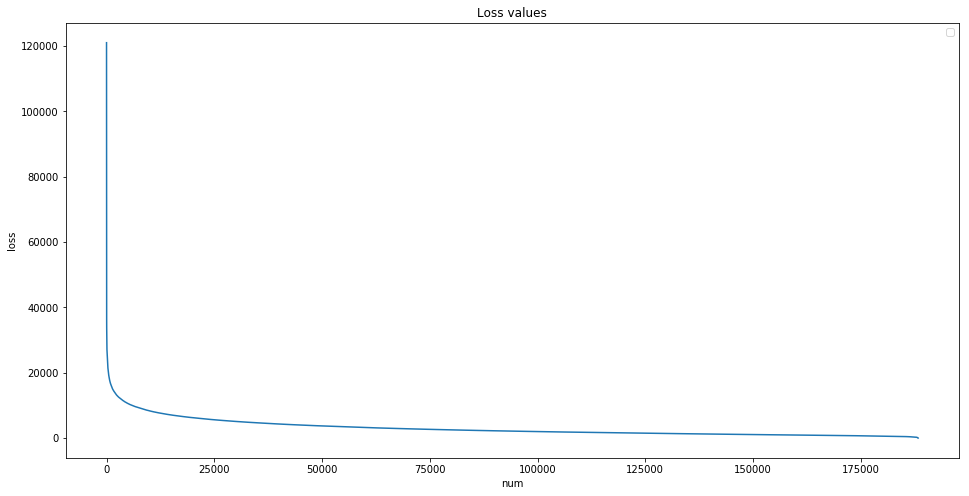

In [22]:
plt.figure(figsize=(16,8))
plt.plot(train['loss'].sort_values(ascending=False).values)
plt.title('Loss values')
plt.xlabel('num')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
stats.mstats.skew(train['loss']).data

array(3.79492815)

In [24]:
stats.mstats.skew(np.log(train['loss'])).data

array(0.0929738)

In [25]:
np.log(train['loss']).head()

0    7.702186
1    7.157424
2    8.008063
3    6.845720
4    7.924380
Name: loss, dtype: float64

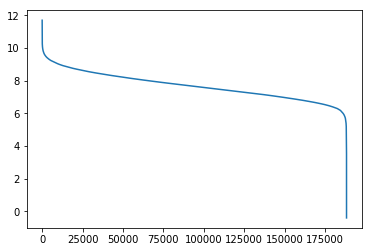

In [26]:
plt.plot(np.log(train['loss']).sort_values(ascending=False).values)

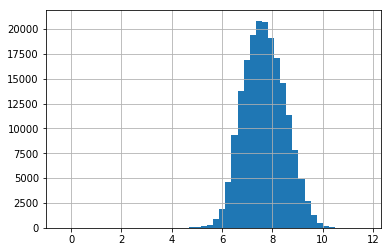

In [27]:
# преобразование целевой переменной (логарифмирование)
np.log(train['loss']).hist(bins=50)

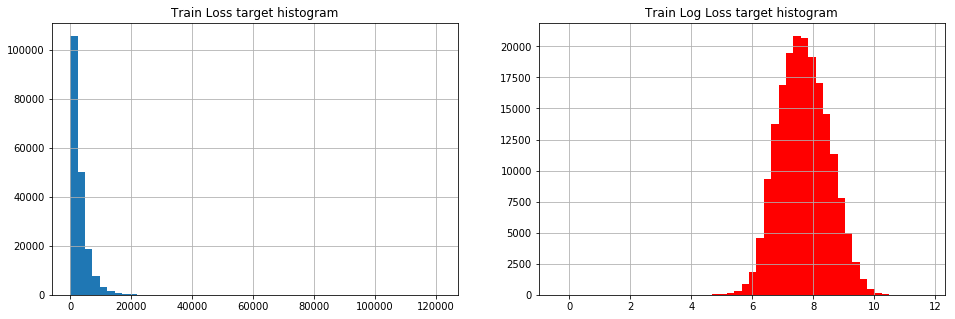

In [28]:
# целечвая переменная - было стало
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['loss'], bins=50)
ax1.set_title('Train Loss target histogram')
ax1.grid(True)
ax2.hist(np.log(train['loss']), bins=50, color='r')
ax2.set_title('Train Log Loss target histogram')
ax2.grid(True)
plt.show()

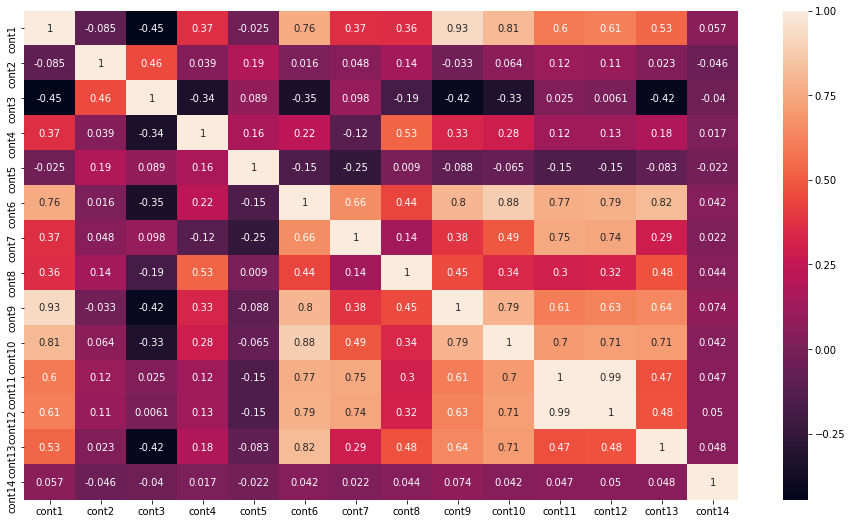

In [29]:
# построение корреляционной матрицы межжду признаками
plt.subplots(figsize=(16,9))
correlation_mat = train[cont_features].corr()
sns.heatmap(correlation_mat, annot=True)

In [30]:
# Удаляеv целевую переменную и индекс

train_d = train.drop(['id','loss'], axis=1)
test_d = test.drop(['id'], axis=1)

# Идентификатор классов

train_d['Target'] = 1
test_d['Target'] = 0

# объедиенение датасетов в один, чтобы удобно было делать преобразования
data = pd.concat((train_d, test_d))

# кодирования категориальных признаков:
data_le = deepcopy(data)
for c in range(len(cat_features)):
    data_le[cat_features[c]] = data_le[cat_features[c]].astype('category').cat.codes

# one hot encoding для категориальных признаков:
data = pd.get_dummies(data=data, columns=cat_features)

In [31]:
data = data.iloc[np.random.permutation(len(data))]
data.reset_index(drop = True, inplace = True)

x = data.drop(['Target'], axis = 1)
y = data.Target

train_examples = 100000

x_train = x[:train_examples]
x_test = x[train_examples:]
y_train = y[:train_examples]
y_test = y[train_examples:]

In [32]:
data_le = data_le.iloc[np.random.permutation(len(data_le))]

In [33]:
X = data_le.iloc[:, :130]
y = data_le.iloc[:, 130:]

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X)

In [34]:
X_reduced[:,1].shape

(313864,)

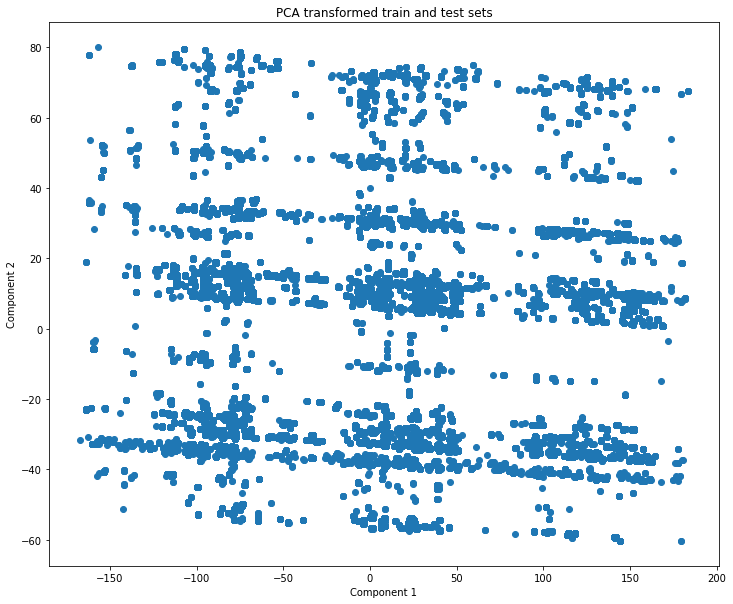

In [35]:
# можем посмотреть какие потенциальные классы можно получить методом кластеризации
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title('PCA transformed train and test sets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
# EDA

In [36]:
train['log_loss'] = np.log(train['loss'])

In [37]:
# отделение числовых и категориальных признаков

features = [x for x in train.columns if x not in ['id','loss', 'log_loss']]

cat_features = [x for x in train.select_dtypes(
        include=['object']).columns if x not in ['id','loss', 'log_loss']]
num_features = [x for x in train.select_dtypes(
        exclude=['object']).columns if x not in ['id','loss', 'log_loss']]

print ("Categorical features:", len(cat_features))
print ("Numerical features:", len(num_features))

Categorical features: 116
Numerical features: 14


In [89]:
# используем label encoder

ntrain = train.shape[0]

train_x = train[features]
train_y_log = train['log_loss']
train_y = train['loss']

for c in range(len(cat_features)):
    train_x[cat_features[c]] = train_x[cat_features[c]].astype('category').cat.codes
    
print ("Xtrain:", train_x.shape)
print ("ytrain:", train_y.shape)

Xtrain: (188318, 130)
ytrain: (188318,)


In [39]:
train_x[cat_features[1]].astype('category').cat.codes[:5]

0    1
1    1
2    1
3    1
4    1
dtype: int8

In [40]:
train_x[cat_features[110]].astype('category').cat.codes[:5]

0    2
1    0
2    0
3    2
4    2
dtype: int8

In [41]:
def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y), np.exp(yhat))

In [42]:
dtrain_log = xgb.DMatrix(train_x, train['log_loss'])
dtrain = xgb.DMatrix(train_x, train['loss'])

In [83]:
xgb_params_logloss = {
    'seed': 0, # случайное число
    'eta': 0.1, # шаг (ламбда из презентации)
    'colsample_bytree': 0.5, # доля колонок - факторов, которые участвуют в подсэмплировании
    'verbosity ': 1,  #вывод в режиме информации
    'subsample': 0.5, # доля на выбор подвыборки перед каждой итерацией
    'objective': 'reg:linear', # выбираем квадратичную ошибку для моделирования логарфима тяжести
    'max_depth': 5, # максимальная глубина дерева. Увеличение глубины увеличивает риск переобучения
    'min_child_weight': 3  #минимальный вес необходимый дочерним элементам. если дочерние элементы получаются с весом меньшим указанного то процесс продолжается
}

In [84]:
xgb_params_loss = {
    'seed': 0, # случайное число
    'eta': 0.1, # шаг (ламбда из презентации)
    'colsample_bytree': 0.5, # доля колонок - факторов, которые участвуют в подсэмплировании
    'verbosity ': 1,  #вывод в режиме информации
    'subsample': 0.5, # доля на выбор подвыборки перед каждой итерацией
    'objective': 'reg:gamma', # выбираем гамма распределение для моделирования тяжести
    'max_depth': 2, # максимальная глубина дерева. Увеличение глубины увеличивает риск переобучения
    'min_child_weight': 3  #минимальный вес необходимый дочерним элементам. если дочерние элементы получаются с весом меньшим указанного то процесс продолжается
}

In [ ]:
# кросс валидация на 3х фолдах для двух моделй

In [67]:
model_logloss = xgb.cv(xgb_params_logloss, dtrain_log, num_boost_round=50, nfold=3, seed=0, 
                     maximize=False, feval=xg_eval_mae, early_stopping_rounds=10) 

In [76]:
model_loss = xgb.cv(xgb_params_loss, dtrain, num_boost_round=50, nfold=3, seed=0, 
                     maximize=False, early_stopping_rounds=10) #feval=xg_eval_mae,

In [69]:
model_logloss[::5]

,train-mae-mean,train-mae-std,train-rmse-mean,train-rmse-std,test-mae-mean,test-mae-std,test-rmse-mean,test-rmse-std
0,3033.952148,8.528313,6.514553,0.002072,3033.952230,17.058461,6.514562,0.005150
5,2988.521566,8.428349,3.881831,0.000788,2988.526774,17.103694,3.881950,0.005766
10,2797.524740,7.879256,2.346189,0.000759,2797.596273,17.285909,2.346498,0.005963
15,2421.311198,6.463328,1.467938,0.000540,2421.519206,17.729990,1.468458,0.005342
20,1983.225260,5.867754,0.988384,0.001043,1984.270345,16.585395,0.989484,0.004181
25,1640.333985,5.323741,0.748077,0.000972,1642.872355,13.636910,0.749797,0.002666
30,1432.620443,4.891559,0.639144,0.000736,1437.080404,10.270744,0.641683,0.001616
35,1319.586181,4.827079,0.592821,0.000841,1326.194865,7.645533,0.595981,0.000751
40,1259.121948,3.739853,0.572643,0.000862,1267.569051,6.923905,0.576284,0.000339
45,1226.568644,3.706786,0.563289,0.000780,1236.484985,6.082219,0.567345,0.000364


In [70]:
model_loss[::5]

,train-gamma-nloglik-mean,train-gamma-nloglik-std,test-gamma-nloglik-mean,test-gamma-nloglik-std
0,5496.084636,15.437326,5496.088216,30.865370
5,3334.194255,9.363613,3334.187581,18.731563
10,2023.127319,5.678227,2023.123454,11.362041
15,1228.121867,3.443732,1228.121867,6.894107
20,746.122864,2.088781,746.123271,4.183018
25,453.972890,1.267577,453.973155,2.539585
30,276.970968,0.769245,276.970998,1.542776
35,169.808375,0.466940,169.808655,0.937834
40,105.004977,0.283394,105.005175,0.570737
45,65.892138,0.171907,65.892505,0.348309


<Figure size 432x288 with 0 Axes>

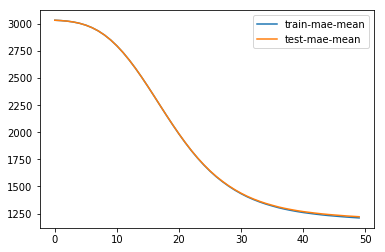

In [71]:
plt.figure()
model_logloss[['train-mae-mean', 'test-mae-mean']].plot()

<Figure size 432x288 with 0 Axes>

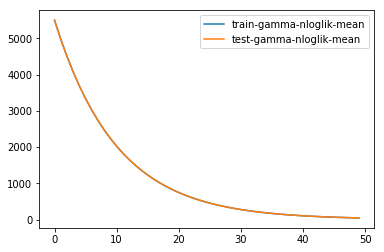

In [77]:
plt.figure()
model_loss[['train-gamma-nloglik-mean', 'test-gamma-nloglik-mean']].plot()

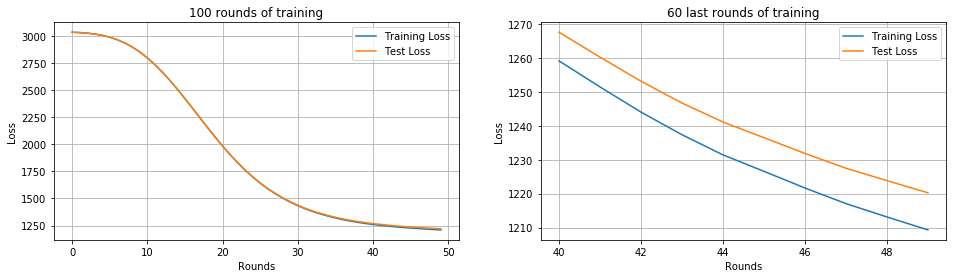

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,4)

ax1.set_title('100 rounds of training')
ax1.set_xlabel('Rounds')
ax1.set_ylabel('Loss')
ax1.grid(True)
#ax1.plot(bst_cv2[['train-mae-mean', 'test-mae-mean']])
ax1.plot(model_logloss[['train-mae-mean', 'test-mae-mean']])
ax1.legend(['Training Loss', 'Test Loss'])

ax2.set_title('60 last rounds of training')
ax2.set_xlabel('Rounds')
ax2.set_ylabel('Loss')
ax2.grid(True)
#ax2.plot(bst_cv2.iloc[40:][['train-mae-mean', 'test-mae-mean']])
ax2.plot(model_logloss.iloc[40:][['train-mae-mean', 'test-mae-mean']])
ax2.legend(['Training Loss', 'Test Loss'])

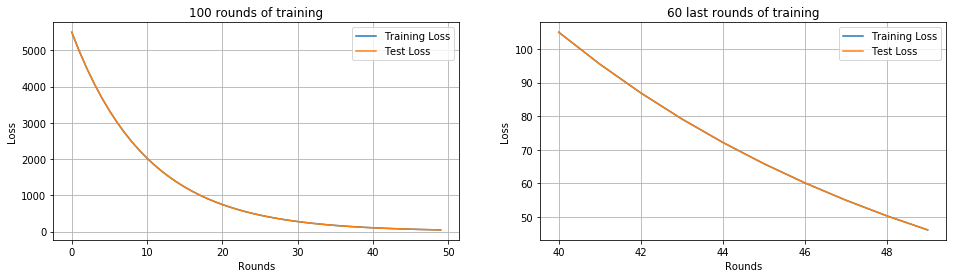

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,4)

ax1.set_title('100 rounds of training')
ax1.set_xlabel('Rounds')
ax1.set_ylabel('Loss')
ax1.grid(True)
#ax1.plot(bst_cv2[['train-mae-mean', 'test-mae-mean']])
ax1.plot(model_loss[['train-gamma-nloglik-mean', 'test-gamma-nloglik-mean']])
ax1.legend(['Training Loss', 'Test Loss'])

ax2.set_title('60 last rounds of training')
ax2.set_xlabel('Rounds')
ax2.set_ylabel('Loss')
ax2.grid(True)
#ax2.plot(bst_cv2.iloc[40:][['train-mae-mean', 'test-mae-mean']])
ax2.plot(model_loss.iloc[40:][['train-gamma-nloglik-mean', 'test-gamma-nloglik-mean']])
ax2.legend(['Training Loss', 'Test Loss'])

bst_cv2 = xgb.cv(xgb_params, dtrain, num_boost_round=200, 
                    nfold=3, seed=0,  maximize=False, 
                    early_stopping_rounds=10) # feval=xg_eval_mae,

print ('CV score:', bst_cv2.iloc[-1,:]['test-gamma-nloglik-mean'])

In [92]:
# определим свой класс со своими методами gamma

class XGBoostRegressor(object):
    def __init__(self, **kwargs):
        self.params = kwargs
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
        self.params.update({'verbosity': 1, 'objective': 'reg:gamma', 'seed': 0})
        
    def fit(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, y_train)
        self.bst = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                              maximize=False) #feval=xg_eval_mae,
        
    def predict(self, x_pred):
        dpred = xgb.DMatrix(x_pred)
        return self.bst.predict(dpred)
    
    def kfold(self, x_train, y_train, nfold=5):
        dtrain = xgb.DMatrix(x_train, y_train)
        cv_rounds = xgb.cv(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                           nfold=nfold, maximize=False, early_stopping_rounds=10)  #feval=xg_eval_mae,
        return cv_rounds.iloc[-1,:]
    
    def plot_feature_importances(self):
        feat_imp = pd.Series(self.bst.get_fscore()).sort_values(ascending=False)
        feat_imp.plot(title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        self.params.update(params)
        return self

In [93]:
# определим свой класс со своими методами 

class XGBoostRegressorMAE(object):
    def __init__(self, **kwargs):
        self.params = kwargs
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
        self.params.update({'verbosity': 1, 'objective': 'reg:linear', 'seed': 0})
        
    def fit(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, y_train)
        self.bst = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                              maximize=False, feval=xg_eval_mae,) #
        
    def predict(self, x_pred):
        dpred = xgb.DMatrix(x_pred)
        return self.bst.predict(dpred)
    
    def kfold(self, x_train, y_train, nfold=5):
        dtrain = xgb.DMatrix(x_train, y_train)
        cv_rounds = xgb.cv(params=self.params, dtrain=dtrain, num_boost_round=self.num_boost_round,
                           nfold=nfold, maximize=False, early_stopping_rounds=10)  #feval=xg_eval_mae,
        return cv_rounds.iloc[-1,:]
    
    def plot_feature_importances(self):
        feat_imp = pd.Series(self.bst.get_fscore()).sort_values(ascending=False)
        feat_imp.plot(title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        self.params.update(params)
        return self

In [104]:
# функции по которым идет оптимизация
def mae_score(y_true, y_pred):
    return mean_absolute_error(np.exp(y_true), np.exp(y_pred))

mae_scorer = make_scorer(mae_score, greater_is_better=False)

In [109]:
def loss_score(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

loss_scorer = make_scorer(loss_score, greater_is_better=False)

bst = XGBoostRegressor(eta=0.1, colsample_bytree=0.5, subsample=0.5, 
                       max_depth=5, min_child_weight=3, num_boost_round=50)

bst.kfold(train_x, train_y, nfold=5)

In [ ]:
# подбор гиперпараметров

In [97]:
# создание сетки параметров
xgb_param_grid = {'max_depth': np.arange(4,5), 'min_child_weight': (1,3)}

In [98]:
# перебор по сетке для логарифмированной целевой переменной

grid = GridSearchCV(XGBoostRegressorMAE(eta=0.1, num_boost_round=50, colsample_bytree=0.5, subsample=0.5),
                    param_grid=xgb_param_grid, cv=2, scoring=mae_scorer)

grid.fit(train_x, train_y_log.values)

GridSearchCV(cv=2, error_score='raise',
       estimator=<__main__.XGBoostRegressorMAE object at 0x0000027E80FF7D30>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([4]), 'min_child_weight': (1, 3)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mae_score, greater_is_better=False), verbose=0)

In [99]:
# просмотр результатов
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: -1244.62478, std: 1.58060, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: -1244.84480, std: 0.77473, params: {'max_depth': 4, 'min_child_weight': 3}],
 {'max_depth': 4, 'min_child_weight': 1},
 -1244.6247815421991)

In [110]:
# перебор по сетке для неизменной целевой переменной

grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, colsample_bytree=0.5, subsample=0.5),
                    param_grid=xgb_param_grid, cv=2, scoring=loss_scorer) # - переделать на соответсвующий скорер

grid.fit(train_x, train_y.values)

GridSearchCV(cv=2, error_score='raise',
       estimator=<__main__.XGBoostRegressor object at 0x0000027E81AB3390>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([4]), 'min_child_weight': (1, 3)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(loss_score, greater_is_better=False), verbose=0)

In [111]:

grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: -2965.11596, std: 2.61051, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: -2965.11596, std: 2.61051, params: {'max_depth': 4, 'min_child_weight': 3}],
 {'max_depth': 4, 'min_child_weight': 1},
 -2965.115956020794)

In [112]:
# перебор по сетке для скорости обучения для логарифмированной целевой переменной

xgb_param_grid = {'eta':[0.1,0.075,0.05,0.04]}
grid = GridSearchCV(XGBoostRegressorMAE(num_boost_round=100, gamma=0.2, max_depth=8, min_child_weight=6,
                                         colsample_bytree=0.6, subsample=0.9),
                        param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

grid.fit(train_x, train_y_log.values)

GridSearchCV(cv=5, error_score='raise',
       estimator=<__main__.XGBoostRegressorMAE object at 0x0000027E81AB3780>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'eta': [0.1, 0.075, 0.05, 0.04]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mae_score, greater_is_better=False), verbose=0)

In [113]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: -1151.53791, std: 5.41160, params: {'eta': 0.1},
  mean: -1156.35789, std: 5.75670, params: {'eta': 0.075},
  mean: -1184.31802, std: 6.25680, params: {'eta': 0.05},
  mean: -1242.96211, std: 7.46827, params: {'eta': 0.04}],
 {'eta': 0.1},
 -1151.5379132660423)

In [126]:
def convert_grid_scores(scores):
    _params = []
    _params_mae = []    
    for i in scores:
        _params.append(i[0].values())
        _params_mae.append(i[1])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_mae))
    return [grid_res[:,i] for i in range(grid_res.shape[1])]

In [144]:
eta,scores =  convert_grid_scores(grid.grid_scores_)

In [152]:
eta=np.array([0.1,0.075,0.05,0.04])

In [146]:
eta

array([0.1  , 0.075, 0.05 , 0.04 ])

In [147]:
np.array(scores)

array([-1151.5379132660423, -1156.3578896987676, -1184.3180170220419,
       -1242.9621136558294], dtype=object)

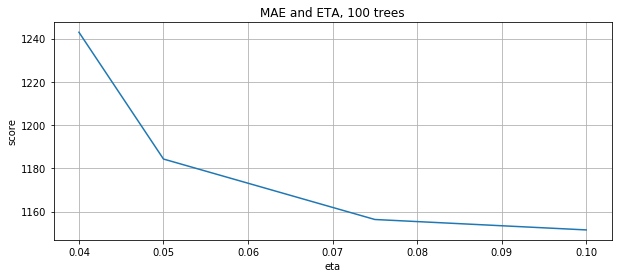

In [153]:
_, y = convert_grid_scores(grid.grid_scores_)
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [154]:
# перебор по сетке для скорости обучения для неизменной целевой переменной

xgb_param_grid = {'eta':[0.1,0.075,0.05,0.04]}
grid = GridSearchCV(XGBoostRegressor(num_boost_round=100, gamma=0.2, max_depth=8, min_child_weight=6,
                                         colsample_bytree=0.6, subsample=0.9),
                        param_grid=xgb_param_grid, cv=5, scoring=loss_scorer)

grid.fit(train_x, train_y.values)

GridSearchCV(cv=5, error_score='raise',
       estimator=<__main__.XGBoostRegressor object at 0x0000027E97A1E588>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'eta': [0.1, 0.075, 0.05, 0.04]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(loss_score, greater_is_better=False), verbose=0)

In [155]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: -1389.51475, std: 7.04043, params: {'eta': 0.1},
  mean: -2383.20417, std: 7.71729, params: {'eta': 0.075},
  mean: -2965.26978, std: 7.39843, params: {'eta': 0.05},
  mean: -3010.32565, std: 7.39363, params: {'eta': 0.04}],
 {'eta': 0.1},
 -1389.5147528083107)

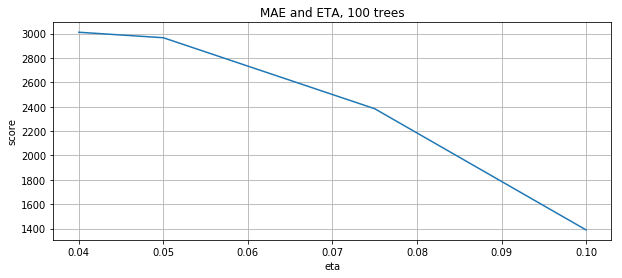

In [156]:
_, y = convert_grid_scores(grid.grid_scores_)
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [175]:
model_mae=XGBoostRegressorMAE(eta=0.05, num_boost_round=100, gamma=0.2, max_depth=8, min_child_weight=6, colsample_bytree=0.6, subsample=0.9)

In [186]:
model_log=XGBoostRegressor(eta=0.9, num_boost_round=100, gamma=0.2, max_depth=8, min_child_weight=6, colsample_bytree=0.6, subsample=0.9)

In [176]:
model_mae.fit(train_x, train_y_log)

In [187]:
model_log.fit(train_x, train_y)

In [177]:
result_mae=np.exp(model_mae.predict(train_x))

In [188]:
result_log=model_log.predict(train_x)

<function matplotlib.pyplot.show(*args, **kw)>

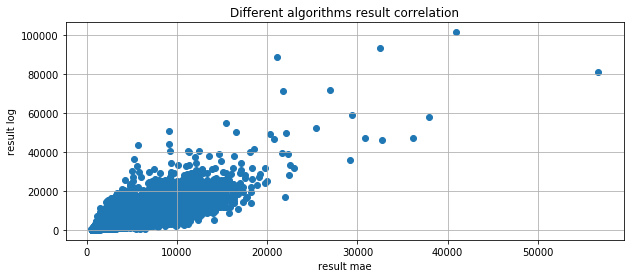

In [189]:
plt.figure(figsize=(10,4))
plt.title('Different algorithms result correlation')
plt.xlabel('result mae')
plt.ylabel('result log')
plt.scatter(result_mae,result_log)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

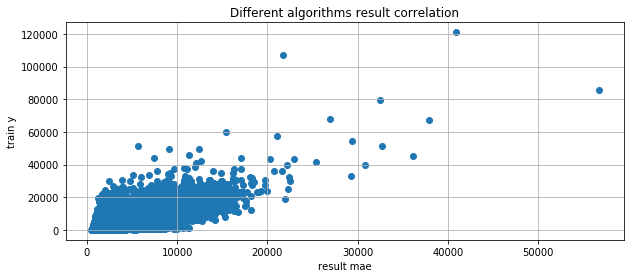

In [190]:
plt.figure(figsize=(10,4))
plt.title('Different algorithms result correlation')
plt.xlabel('result mae')
plt.ylabel('train y')
plt.scatter(result_mae,train_y)
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

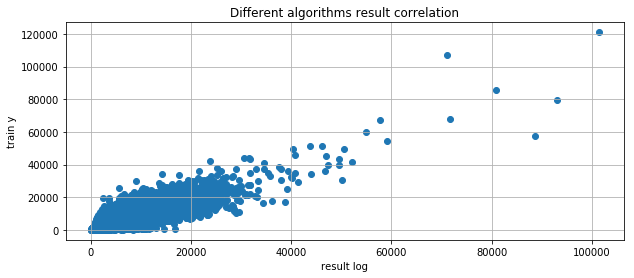

In [191]:
plt.figure(figsize=(10,4))
plt.title('Different algorithms result correlation')
plt.xlabel('result log')
plt.ylabel('train y')
plt.scatter(result_log,train_y)
plt.grid(True)
plt.show

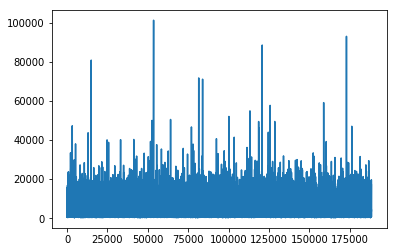

In [193]:
plt.plot(result_log)

In [ ]:
#########################################################################
#########################################################################
#########################################################################
#########################################################################
# прочие наработки

In [146]:
%%time

if USE_PRETRAINED:
    with open('pretrained/xgb_grid_max_depth.pkl', 'rb') as f: 
        grid = pickle.load(f)
else:    
    grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, colsample_bytree=0.5, subsample=0.5),
                    param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

    grid.fit(train_x, train_y.values)

Wall time: 57min 14s


In [147]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: -1243.19602, std: 6.69931, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: -1243.39015, std: 6.75381, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: -1243.50966, std: 6.60818, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: -1219.54711, std: 6.70268, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -1218.92390, std: 6.67392, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -1219.23924, std: 6.90520, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: -1204.83179, std: 6.41207, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: -1203.45993, std: 7.20270, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: -1203.89264, std: 7.03485, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: -1195.25605, std: 6.01136, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -1194.26800, std: 6.89758, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -1193.43528, std: 6.54429, params: {'max_depth': 7, 'min_child_weigh

In [156]:
grid.grid_scores_

[mean: -1243.19602, std: 6.69931, params: {'max_depth': 4, 'min_child_weight': 1},
 mean: -1243.39015, std: 6.75381, params: {'max_depth': 4, 'min_child_weight': 3},
 mean: -1243.50966, std: 6.60818, params: {'max_depth': 4, 'min_child_weight': 6},
 mean: -1219.54711, std: 6.70268, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: -1218.92390, std: 6.67392, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: -1219.23924, std: 6.90520, params: {'max_depth': 5, 'min_child_weight': 6},
 mean: -1204.83179, std: 6.41207, params: {'max_depth': 6, 'min_child_weight': 1},
 mean: -1203.45993, std: 7.20270, params: {'max_depth': 6, 'min_child_weight': 3},
 mean: -1203.89264, std: 7.03485, params: {'max_depth': 6, 'min_child_weight': 6},
 mean: -1195.25605, std: 6.01136, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: -1194.26800, std: 6.89758, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: -1193.43528, std: 6.54429, params: {'max_depth': 7, 'min_child_weight': 6},
 mea

In [154]:
def convert_grid_scores(scores):
    _params = []
    _params_mae = []    
    for i in scores:
        _params.append(i[0].values())
        _params_mae.append(i[1])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_mae))
    return [grid_res[:,i] for i in range(grid_res.shape[1])]

In [160]:
_,scores =  convert_grid_scores(grid.grid_scores_)

In [161]:
scores

array([-1243.1960158802406, -1243.3901452470907, -1243.509656493176,
       -1219.547112817002, -1218.923898611929, -1219.2392351027208,
       -1204.8317883167767, -1203.4599328466395, -1203.8926386559756,
       -1195.2560510772478, -1194.268004732305, -1193.4352755950406,
       -1189.1482965498208, -1187.8954694110096, -1187.7792974953536],
      dtype=object)

In [162]:
scores = scores.reshape(5,3)

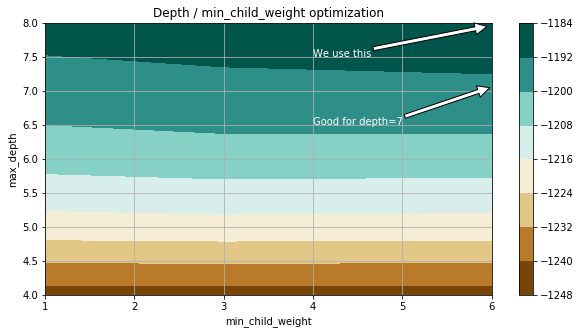

In [163]:
plt.figure(figsize=(10,5))
cp = plt.contourf(xgb_param_grid['min_child_weight'], xgb_param_grid['max_depth'], scores, cmap='BrBG')
plt.colorbar(cp)
plt.title('Depth / min_child_weight optimization')
plt.annotate('We use this', xy=(5.95, 7.95), xytext=(4, 7.5), arrowprops=dict(facecolor='white'), color='white')
plt.annotate('Good for depth=7', xy=(5.98, 7.05), 
             xytext=(4, 6.5), arrowprops=dict(facecolor='white'), color='white')
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.grid(True)
plt.show()

In [164]:
%%time

if USE_PRETRAINED:
    with open('pretrained/xgb_grid_gamma.pkl', 'rb') as f: 
        grid = pickle.load(f)
    
else:
    xgb_param_grid = {'gamma':[ 0.1 * i for i in range(0,5)]}

    grid = GridSearchCV(XGBoostRegressor(eta=0.1, num_boost_round=50, max_depth=8, min_child_weight=6,
                                         colsample_bytree=0.5, subsample=0.5),
                        param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

    grid.fit(train_x, train_y.values)

Wall time: 18min 23s


In [165]:
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: -1187.77930, std: 6.90063, params: {'gamma': 0.0},
  mean: -1187.68314, std: 6.35470, params: {'gamma': 0.1},
  mean: -1187.34526, std: 6.88032, params: {'gamma': 0.2},
  mean: -1187.57356, std: 6.72937, params: {'gamma': 0.30000000000000004},
  mean: -1188.07283, std: 6.71768, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 -1187.3452616386749)

In [ ]:
%%time

xgb_param_grid = {'subsample':[ 0.1 * i for i in range(5,10)],
                      'colsample_bytree':[ 0.1 * i for i in range(5,10)]}

if USE_PRETRAINED: 
    with open('pretrained/xgb_grid_search_sampling.pkl', 'rb') as f:
        grid = pickle.load(f)
else:
    grid = GridSearchCV(XGBoostRegressor(eta=0.1, gamma=0.2, num_boost_round=50, max_depth=8, min_child_weight=6),
                        param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)
    grid.fit(train_x, train_y.values)

In [ ]:
grid.grid_scores_, grid.best_params_, grid.best_score_

In [ ]:
_, _, scores =  convert_grid_scores(grid.grid_scores_)
scores = scores.reshape(5,5)

plt.figure(figsize=(10,5))
cp = plt.contourf(xgb_param_grid['subsample'], xgb_param_grid['colsample_bytree'], scores, cmap='BrBG')
plt.colorbar(cp)
plt.title('Subsampling params tuning')
plt.annotate('Optimum', xy=(0.895, 0.6), xytext=(0.8, 0.695), arrowprops=dict(facecolor='black'))
plt.xlabel('subsample')
plt.ylabel('colsample_bytree')
plt.grid(True)
plt.show()

In [ ]:
%%time

if USE_PRETRAINED:
    with open('pretrained/xgb_grid_search_eta_50.pkl', 'rb') as f:
        grid = pickle.load(f)
else:      
    xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
    grid = GridSearchCV(XGBoostRegressor(num_boost_round=50, gamma=0.2, max_depth=8, min_child_weight=6,
                                         colsample_bytree=0.6, subsample=0.9),
                        param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

    grid.fit(train_x, train_y.values)

In [ ]:
grid.grid_scores_, grid.best_params_, grid.best_score_

In [ ]:
eta, y = convert_grid_scores(grid.grid_scores_)
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 50 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [ ]:
%%time

if USE_PRETRAINED:
    with open('pretrained/xgb_grid_search_eta_100.pkl', 'rb') as f:
        grid = pickle.load(f)
else:
    xgb_param_grid = {'eta':[0.5,0.4,0.3,0.2,0.1,0.075,0.05,0.04,0.03]}
    grid = GridSearchCV(XGBoostRegressor(num_boost_round=100, gamma=0.2, max_depth=8, min_child_weight=6,
                                         colsample_bytree=0.6, subsample=0.9),
                        param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

    grid.fit(train_x, train_y.values)

In [ ]:
grid.grid_scores_, grid.best_params_, grid.best_score_

In [ ]:
eta, y = convert_grid_scores(grid.grid_scores_)
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 100 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [ ]:
%%time

if USE_PRETRAINED:
    with open('pretrained/xgb_grid_search_eta_200.pkl', 'rb') as f:
        grid = pickle.load(f)
else:
    xgb_param_grid = {'eta':[0.09,0.08,0.07,0.06,0.05,0.04]}
    grid = GridSearchCV(XGBoostRegressor(num_boost_round=200, gamma=0.2, max_depth=8, min_child_weight=6,
                                         colsample_bytree=0.6, subsample=0.9),
                        param_grid=xgb_param_grid, cv=5, scoring=mae_scorer)

    grid.fit(train_x, train_y.values)

In [ ]:
grid.grid_scores_, grid.best_params_, grid.best_score_

In [ ]:
eta, y = convert_grid_scores(grid.grid_scores_)
plt.figure(figsize=(10,4))
plt.title('MAE and ETA, 200 trees')
plt.xlabel('eta')
plt.ylabel('score')
plt.plot(eta, -y)
plt.grid(True)
plt.show()

In [222]:
%%time

# Final XGBoost model

if USE_PRETRAINED:
    with open('pretrained/xgb_cv_eta_200.pkl', 'rb') as f:
        cv = pickle.load(f)
else:
    bstm = XGBoostRegressor(num_boost_round=50, eta=0.07, gamma=0.2, max_depth=5, min_child_weight=5,
                                         colsample_bytree=0.6, subsample=0.9)
    

Wall time: 0 ns


In [227]:
cv = bstm.kfold(train_x, train_y, nfold=2)

[23:00:20] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:00:20] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:00:21] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:00:21] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:00:21] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:00:22] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:00:22] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree

[23:00:38] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:00:38] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[23:00:39] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:00:39] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:00:39] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:00:40] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[23:00:40] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree

In [228]:
cv

train-gamma-nloglik-mean    187.176308
train-gamma-nloglik-std       0.536095
test-gamma-nloglik-mean     187.176659
test-gamma-nloglik-std        0.542076
Name: 49, dtype: float64

In [215]:
type(train_x)

pandas.core.frame.DataFrame

In [231]:
bstm.fit(train_x, train_y)

[23:07:04] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:07:04] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:07:04] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:07:05] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:07:05] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:07:06] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:07:06] INFO: C:\Users\Administrator\Desktop\xgboost\src\tree